### **Ayberk Demirkanat**

# PCA through Singular Value Decomposition

In [ ]:
import numpy as np
# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0],[4, 3, 0]])


# Calculate the covariance matrix:
R = np.cov(X, bias=True)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition

u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


# PCA on Iris data

In [1]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris

iris = load_iris()
print(f"Iris future names: {iris.feature_names}")
print(iris.data[0:5,:])
print(iris.target[:])

Iris future names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


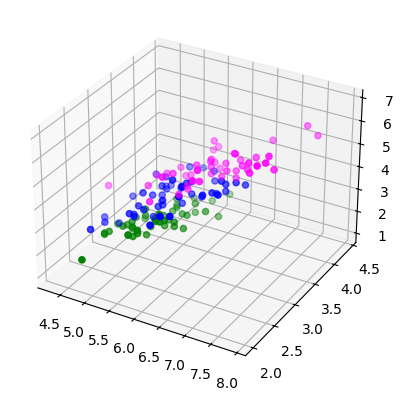

In [2]:
# We have 4 dimensions of data, plot the first three colums in 3D
X = iris.data
y = iris.target

# Plotting in 3D
import matplotlib.pyplot as plt
axes1 = plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show()


Covariance matrix
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]



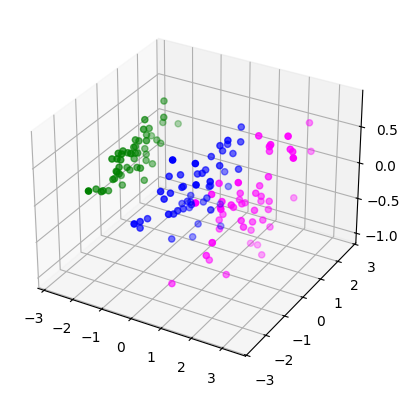

In [6]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)           # Pre-processed data

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)            # Taking only first 3 pca components
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(f"Covariance matrix\n{pca.get_covariance()}", end="\n\n")

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()


Covariance Matrix
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]



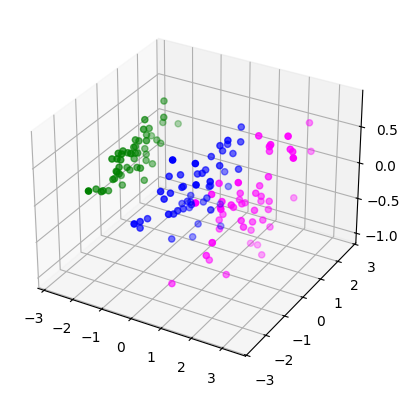

In [11]:
from sklearn import decomposition

# Define PCA object
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(f"Covariance Matrix\n {pca.get_covariance()}",end="\n\n")

# You can plot the transformed feature space in 3D
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()

In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [14]:
print(f"Information on the axes: {pca.explained_variance_ratio_}")         # Show the percentage of information in these axis for first 73% etc.

Information on the axes: [0.72962445 0.22850762 0.03668922]


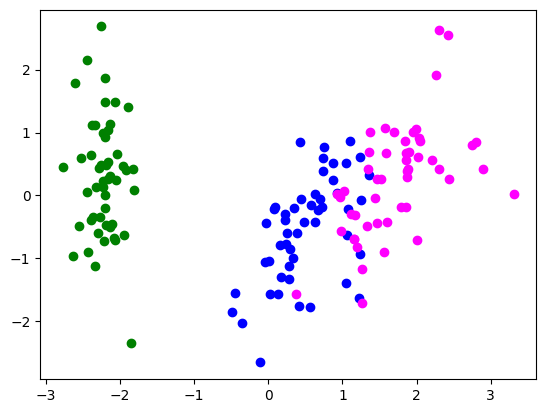

In [15]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')
plt.show()

# KNN classifier

[[19  0  0]
 [ 0 11  1]
 [ 0  1 13]]


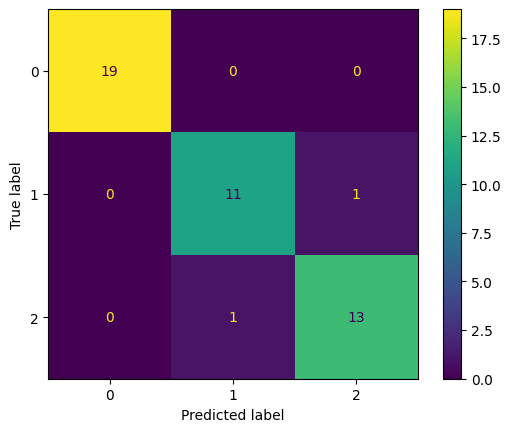

In [16]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred = knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)


In [ ]:
# Xpp
# Xpca all columns
# From PCA remove 3rd feature [0:2]
# Apply KNN , (You can also remove 2 column just to try)
# Remove first column/feature (Since all good information is in the first column removing it would cause some serious issues)


**Xpp + KNN**

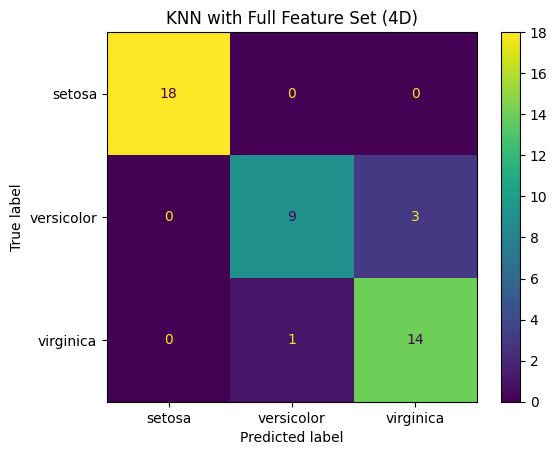

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Original 4-feature data
y = iris.target  # Class labels

# Scale the data to get Xpp (Pre-processed)
scaler = StandardScaler()
Xpp = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with Full Feature Set (4D)")
plt.show()


**Xpca + KNN**

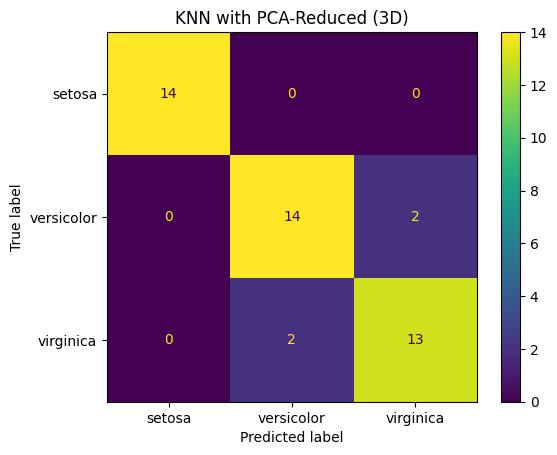

In [26]:
from sklearn.decomposition import PCA

# Apply PCA (into 3 features)
pca_3 = PCA(n_components=3)
X_pca3 = pca_3.fit_transform(Xpp)

# Train-Test Split
X_pca3_train, X_pca3_test, y_train, y_test = train_test_split(X_pca3, y, test_size=0.3)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca3_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_pca3_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with PCA-Reduced (3D)")
plt.show()


**Xpca (Removed 3rd feature)**

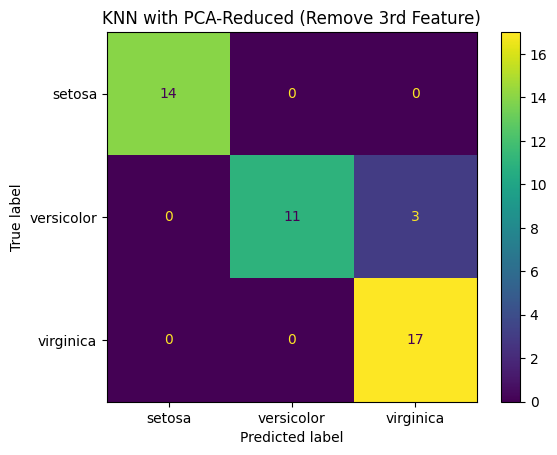

In [27]:
# Remove the 3rd feature from PCA-transformed data
X_pca3_remove_3rd = X_pca3[:, :2]  # Keeping only first 2 PCA components

# Train-Test Split
X_pca3_remove_3rd_train, X_pca3_remove_3rd_test, y_train, y_test = train_test_split(X_pca3_remove_3rd, y, test_size=0.3)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca3_remove_3rd_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_pca3_remove_3rd_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with PCA-Reduced (Remove 3rd Feature)")
plt.show()


**Xpca (Removed First Feature)**

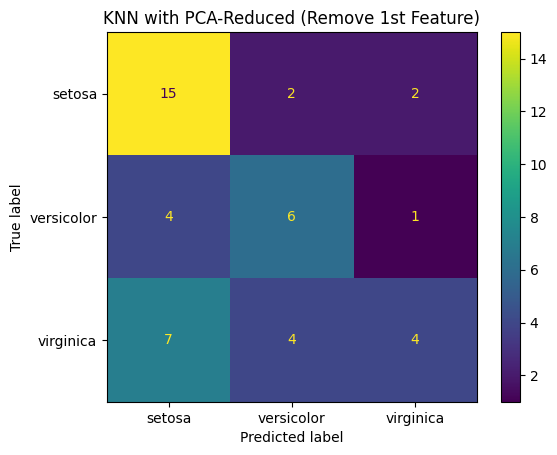

In [28]:
# Remove the 1st feature from PCA-transformed data
X_pca3_remove_1st = X_pca3[:, 1:]  # Keeping only 2nd and 3rd PCA components

# Train-Test Split
X_pca3_remove_1st_train, X_pca3_remove_1st_test, y_train, y_test = train_test_split(X_pca3_remove_1st, y, test_size=0.3)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca3_remove_1st_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_pca3_remove_1st_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with PCA-Reduced (Remove 1st Feature)")
plt.show()


In [ ]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset


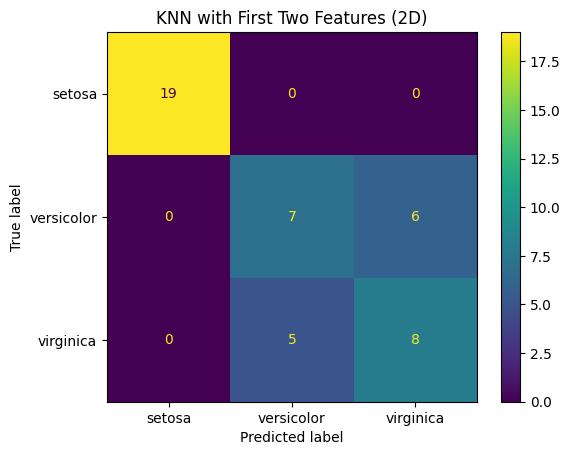

In [35]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features (2D)
y = iris.target  # Class labels

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with First Two Features (2D)")
plt.show()

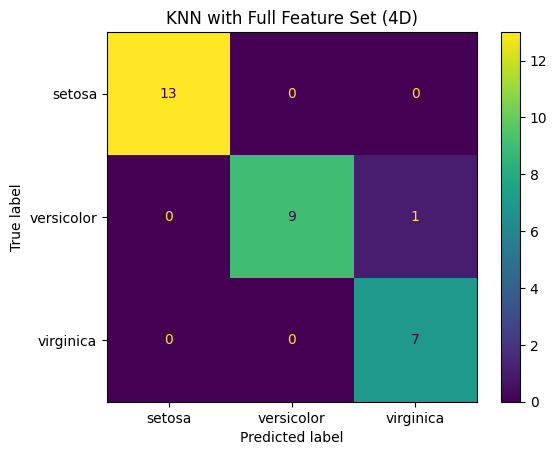

In [36]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Original 4-feature data
y = iris.target  # Class labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train KNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("KNN with Full Feature Set (4D)")
plt.show()